# Demonstration of k-means assumptions

_source_: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [3]:
def plot_demo(X, y, position, title):
    plt.subplot(position)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(title)

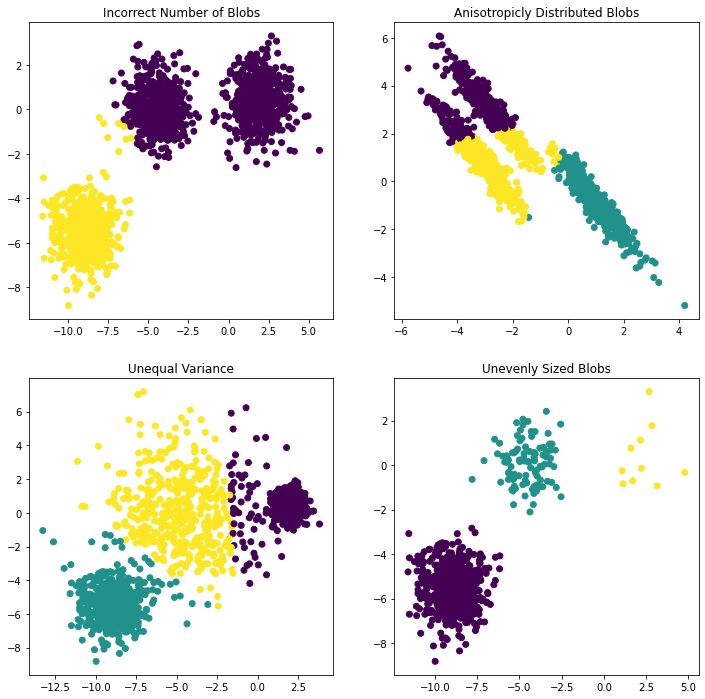

In [4]:
plt.figure(figsize=(12, 12))


# Incorret number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plot_demo(X, y_pred, 221, "Incorrect Number of Blobs")


# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plot_demo(X_aniso, y_pred, 222, "Anisotropicly Distributed Blobs")


# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
plot_demo(X_varied, y_pred, 223, "Unequal Variance")


# # Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)
plot_demo(X_filtered, y_pred, 224, "Unevenly Sized Blobs")


plt.show()